In [1]:
import pandas as pd
import os
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import rasterio
from statsmodels.tsa.seasonal import STL
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime as dt
from matplotlib.colors import TwoSlopeNorm
import time
from scipy.stats import pearsonr

## RWI

In [2]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\Mandal_boundaries_pre')
mandal_boundaries = gpd.read_file('mandal_boundaries.shp')
mandal_boundaries = mandal_boundaries.reset_index()

os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\DPPD_Jesse\\Data\\RWI')
RWI_mandal = gpd.read_file('01-01-2021.geojson')

RWI_mandal['median'] = 0
for i in range(0, len(RWI_mandal)):
    RWI_mandal['median'].iloc[i] = RWI_mandal['zonalstat'].iloc[i]['median']

c:\Users\Jesse\Anaconda3\envs\gurobi\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [3]:
RWI_mandal = RWI_mandal.reset_index()

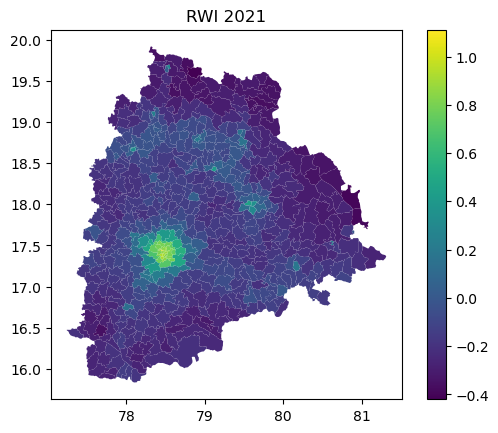

In [4]:
RWI_mandal.plot(column = 'median', legend = True)
plt.title('RWI 2021')
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\DPPD_Jesse\\RWI\\result')
plt.savefig('RWI 2021.png', bbox_inches='tight')
plt.show()

In [5]:
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\Classification_Fires')
fire_data_classified = pd.read_csv('fires_data_classified.csv', index_col=0)
#Select only the agricultural fires
fire_data = fire_data_classified[fire_data_classified['agricultural'] == 1]

In [8]:
fire_data['acq_date'] = pd.to_datetime(fire_data['acq_date'])
fire_data_2021 = fire_data[(fire_data['acq_date']>'2020-01-01') & (fire_data['acq_date']<'2022-01-01')]

<ipython-input-8-d828288e6cc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_data['acq_date'] = pd.to_datetime(fire_data['acq_date'])


In [9]:
 geo_fire_data_2021 = gpd.GeoDataFrame(fire_data_2021,geometry = gpd.points_from_xy(fire_data_2021.longitude,fire_data_2021.latitude), crs = {'init': 'epsg:4326'}) 
 fires_per_boundaries= gpd.sjoin(geo_fire_data_2021, mandal_boundaries, how="inner")
 fires_per_boundaries = fires_per_boundaries.groupby('index')['fireID'].count().reset_index()

c:\Users\Jesse\Anaconda3\envs\gurobi\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
<ipython-input-9-7806d6aab3b5>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  fires_per_boundaries= gpd.sjoin(geo_fire_data_2021, mandal_boundaries, how="inner")


In [13]:
Corr = RWI_mandal.merge(fires_per_boundaries[['fireID', 'index']], how = 'left', on = ['index'])
Corr = Corr.dropna()

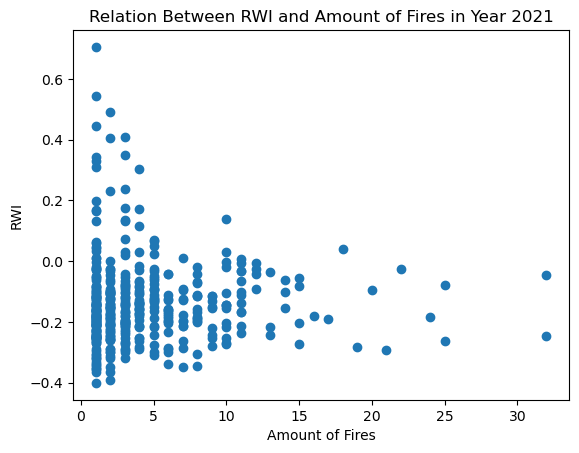

Pearsons correlation: -0.008


In [14]:
plt.scatter(Corr['fireID'], Corr['median'])
plt.title('Relation Between RWI and Amount of Fires in Year 2021')
plt.xlabel('Amount of Fires')
plt.ylabel('RWI')
os.chdir('c:\\Users\\Jesse\\OneDrive\\Documenten\\Master BAOR\\Thesis\\GitHub\\dicra\\analytics\\notebooks\\crop_fires\\DPPD_Jesse\\RWI\\result')
plt.savefig('Relation between RWI and Amount of Fires in Year 2021.png', bbox_inches='tight')
plt.show()


corr, _ = pearsonr(Corr['fireID'], Corr['median'])
print('Pearsons correlation: %.3f' % corr)